In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
X = np.load('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/ex3_X.npy')
y = np.load('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/ex3_Y.npy')

m, n = X.shape

print(m, n)

5000 400


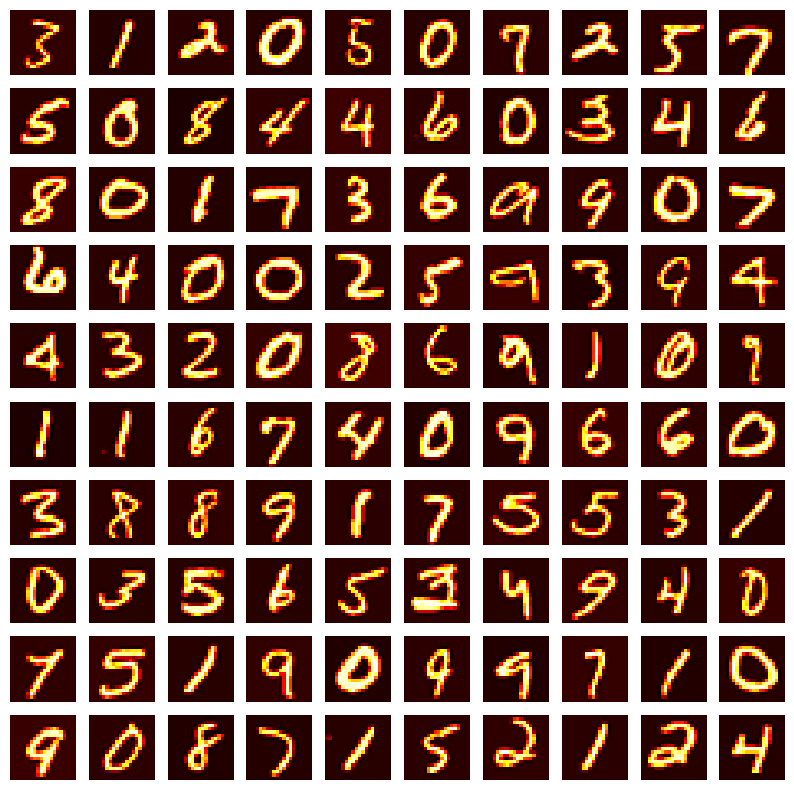

In [7]:
import matplotlib.image as mpimg

fig, axis = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axis[i, j].imshow(X[np.random.randint(0, m+1), :].reshape(20, 20, order='F'), cmap='hot')
    axis[i, j].axis('off')

plt.show()

In [9]:
def compute_sigmoid_value(z):
  return 1 / (1 + np.exp(-np.array(z)))

def compute_Logistic_Regression_Cost(theta, X, y, my_lambda):
  m = y.size
  z = X.dot(theta.T)
  h = compute_sigmoid_value(z)
  temp = theta
  temp[0] = 0
  J = (1/m) * np.sum(-y.dot(np.log(h)) - (1-y).dot(np.log(1-h))) + (my_lambda / (2*m)) * np.sum(np.square(temp))
  grad = (1/m)*(h-y).dot(X)
  grad = grad + (my_lambda/m) * temp
  return J, grad

In [10]:
from scipy import optimize

def train_Logistic_Regression(X, y, number_of_classes, my_lambda):
  m, n = X.shape
  theta = np.zeros((number_of_classes, n + 1))
  X = np.concatenate([np.ones((m,1)),X], axis=1)

  for c in np.arange(number_of_classes):
    init_theta = np.zeros(n+1)
    options = {'maxiter':100}
    result = optimize.minimize(compute_Logistic_Regression_Cost,
                               init_theta,
                               (X, (y==c), my_lambda),
                               jac=True,
                               method='CG',
                               options=options)
    theta[c] = result.x
  return theta

In [14]:
theta = train_Logistic_Regression(X, y, 10, 0.2)

In [15]:
print(theta)

[[-6.90805713e+00  0.00000000e+00  0.00000000e+00 ... -1.05504740e-04
   5.84284033e-06  0.00000000e+00]
 [-2.88724710e+00  0.00000000e+00  0.00000000e+00 ...  4.36652920e-03
   4.06243954e-08  0.00000000e+00]
 [-3.50782285e+00  0.00000000e+00  0.00000000e+00 ...  1.04429831e-02
  -1.18944661e-03  0.00000000e+00]
 ...
 [-2.12509678e+00  0.00000000e+00  0.00000000e+00 ... -1.81404190e-03
   2.19767264e-04  0.00000000e+00]
 [-8.80044683e+00  0.00000000e+00  0.00000000e+00 ... -2.10700476e-04
   1.93734337e-05  0.00000000e+00]
 [-5.16835243e+00  0.00000000e+00  0.00000000e+00 ... -3.97216657e-03
   3.12487003e-04  0.00000000e+00]]


In [16]:
def predict_input(theta, X):
  m, n = X.shape
  numberOfClasses = theta.shape[0]
  X = np.concatenate([np.ones((m,1)), X], axis=1)
  all_h = compute_sigmoid_value(X.dot(theta.T))
  predictedNumber = np.argmax(all_h, axis=1)
  return predictedNumber

In [22]:
predictedResult = predict_input(theta, X) # #predict the result of single image?
print(predictedResult)
print('accuracy = ', np.mean(predictedResult == y)*100)

[0 0 0 ... 9 9 7]
accuracy =  95.84
